In [102]:
import pandas as pd
from datetime import datetime
import numpy as np

In [2]:
df = pd.read_csv('/home/leem/repos/wind-energy-prediction/Dateset#1/Dataset1_forecast.csv')
df2 = pd.read_csv('/home/leem/repos/wind-energy-prediction/Dateset#1/Dataset1_measurement.csv')

In [103]:
trimmed_df = df[:7339]
def format_datetime(date_string):
    date = datetime.strptime(date_string, '%Y-%m-%d %H:%M')
    return date.strftime('%Y-%m-%d %H:%M')
    
trimmed_df['forecast_time'] = trimmed_df['Time'].apply(format_datetime)
trimmed_df.rename(columns = {'windSpeed (m/s)':'forecast_windspeed', 'windDic (degree)':'forecast_windDic'}, inplace = True) 


def format_measured_datetime(date_string):
    date = datetime.strptime(date_string, '%Y-%m-%d %H:%M')
    return date.strftime('%Y-%m-%d %H:00')

df2['forecast_time'] = df2['timeStamp'].apply(format_measured_datetime)
combined_df = pd.merge(df2,trimmed_df, on =['forecast_time'])

'''
for col in combined_df.columns:
    combined_df = combined_df[combined_df[col] != '\\N']
    '''
combined_df.replace('\\N',np.nan, inplace=True)
combined_df = combined_df.interpolate(method='linear', limit_direction='forward', axis=0)
combined_df.dropna()
combined_df = combined_df.astype({'availableMW': float, 'windSpeed': float, 'windPower': float, 'forecast_windspeed':float, 'forecast_windDic':float } )
combined_df.drop(['Time'], axis=1)

/home/leem/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,timeStamp,availableMW,windSpeed,windPower,forecast_time,forecast_windspeed,forecast_windDic
0,2018-01-01 0:00,34.5,11.9,42.5118,2018-01-01 00:00,9.502410,303.854000
1,2018-01-01 0:05,34.5,12.0,42.7067,2018-01-01 00:00,9.502410,303.854000
2,2018-01-01 0:10,34.5,12.0,42.7067,2018-01-01 00:00,9.502410,303.854000
3,2018-01-01 0:15,34.5,11.8,42.3044,2018-01-01 00:00,9.502410,303.854000
4,2018-01-01 0:20,34.5,11.8,42.3044,2018-01-01 00:00,9.502410,303.854000
...,...,...,...,...,...,...,...
79444,2018-12-30 23:35,11.9,3.3,0.0000,2018-12-30 23:00,2.871574,166.134875
79445,2018-12-30 23:40,10.5,3.3,0.0000,2018-12-30 23:00,2.871574,166.134875
79446,2018-12-30 23:45,5.2,3.1,0.0000,2018-12-30 23:00,2.871574,166.134875
79447,2018-12-30 23:50,6.0,3.1,0.0000,2018-12-30 23:00,2.871574,166.134875


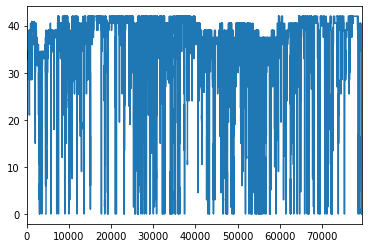

In [104]:
combined_df['availableMW'].plot()

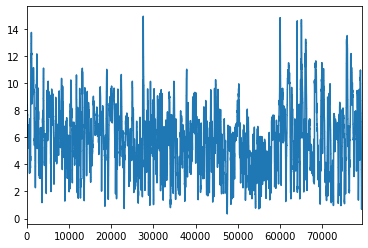

In [94]:
combined_df['forecast_windspeed'].plot()

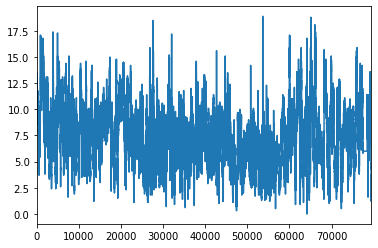

In [95]:
combined_df['windSpeed'].plot()

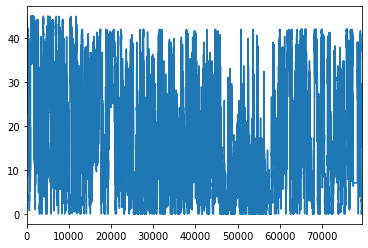

In [96]:
combined_df['windPower'].plot()

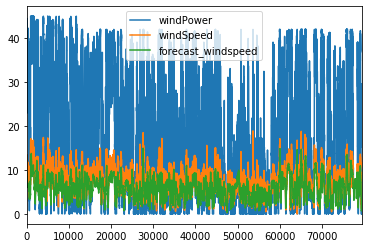

In [105]:
combined_df[['windPower','windSpeed','forecast_windspeed']].plot()

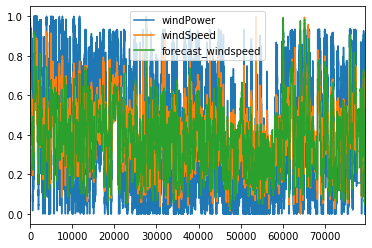

In [109]:
for column in combined_df.columns:
    if combined_df[column].dtypes != float:
        continue
    combined_df[column] = combined_df[column] /combined_df[column].abs().max() 
combined_df[['windPower','windSpeed','forecast_windspeed']].plot()

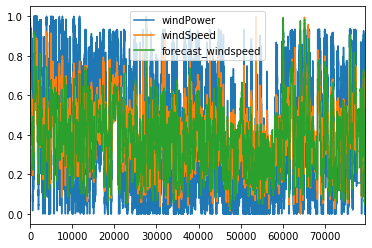